In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import muon
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["figure.dpi"] = 240

['default', 'despine']


In [2]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/EDA"

In [3]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
        'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [4]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")
adata = mudata["rna"]
adata.obsm["X_umap"] = mudata.obsm["X_umap"]

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [5]:
adata.X = adata.layers["raw_counts"]

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

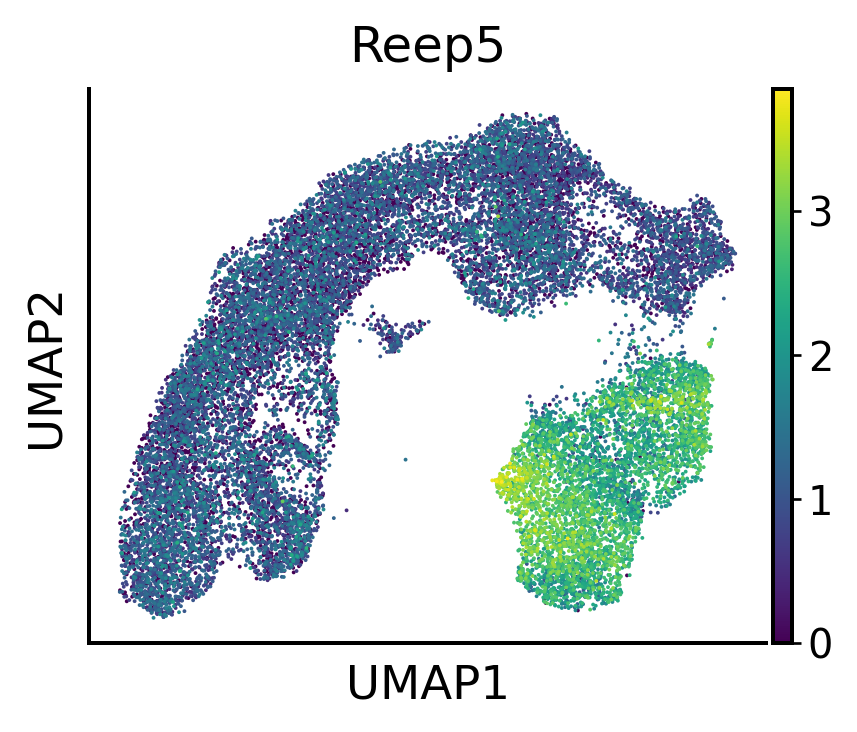

In [7]:
fig = sc.pl.umap(adata, color="Reep5", return_fig=True)

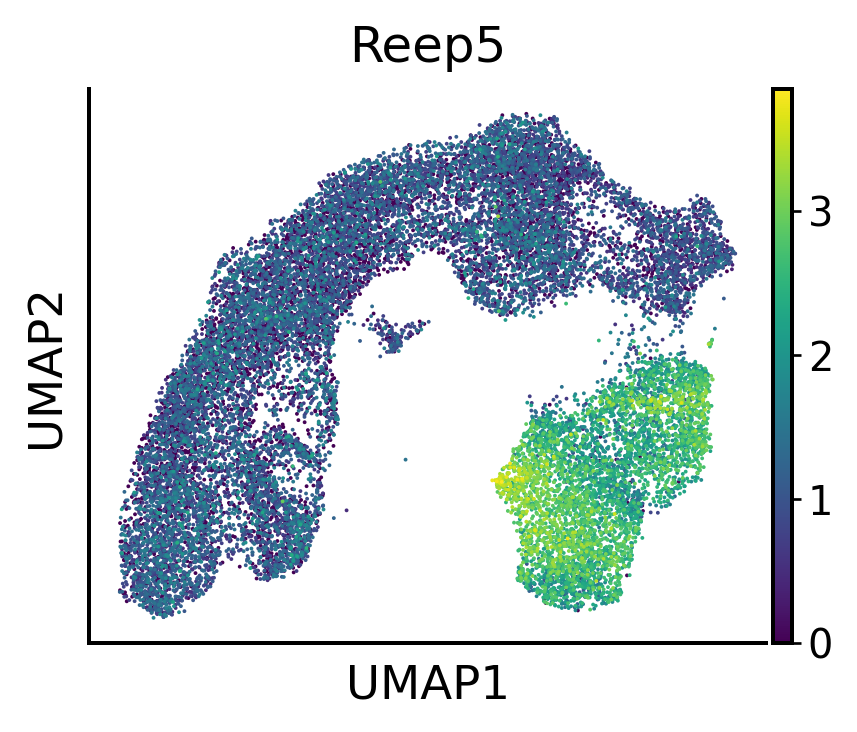

In [8]:
fig

In [9]:
fig.figure.savefig(os.path.join(output_dir, 'Reep5.png'))

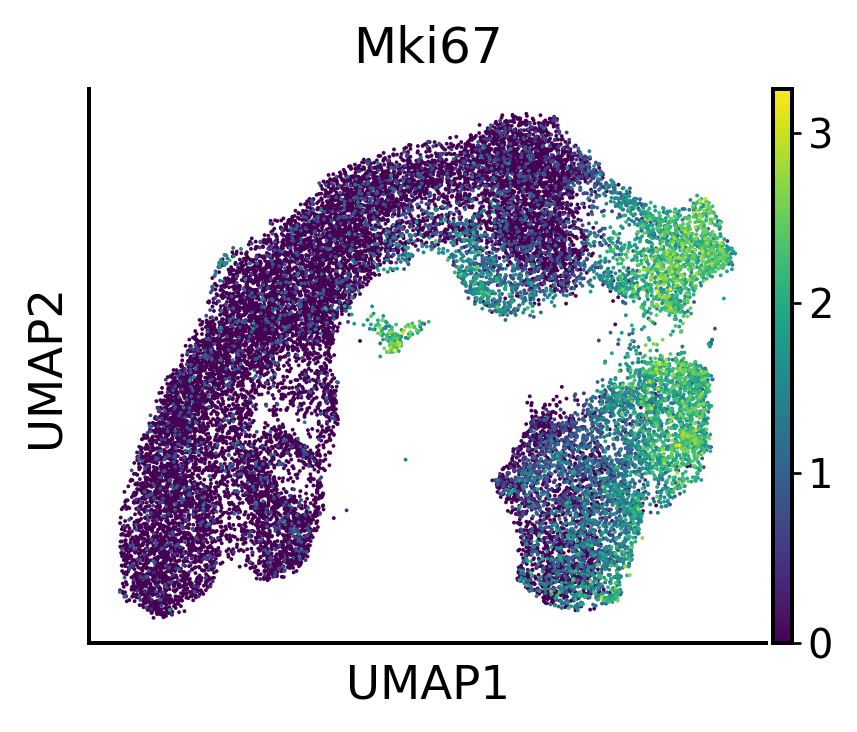

In [10]:
fig = sc.pl.umap(adata, color="Mki67", return_fig=True)

In [11]:
fig.figure.savefig(os.path.join(output_dir, 'Mki67.png'))

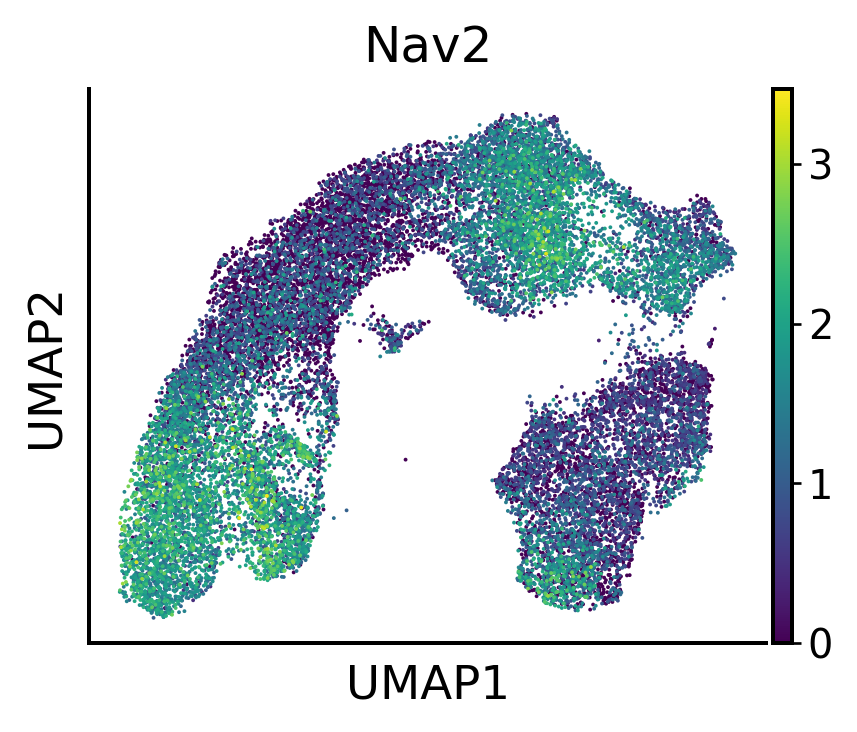

In [12]:
fig = sc.pl.umap(adata, color="Nav2", return_fig=True)

In [13]:
fig.figure.savefig(os.path.join(output_dir, 'Nav2.png'))

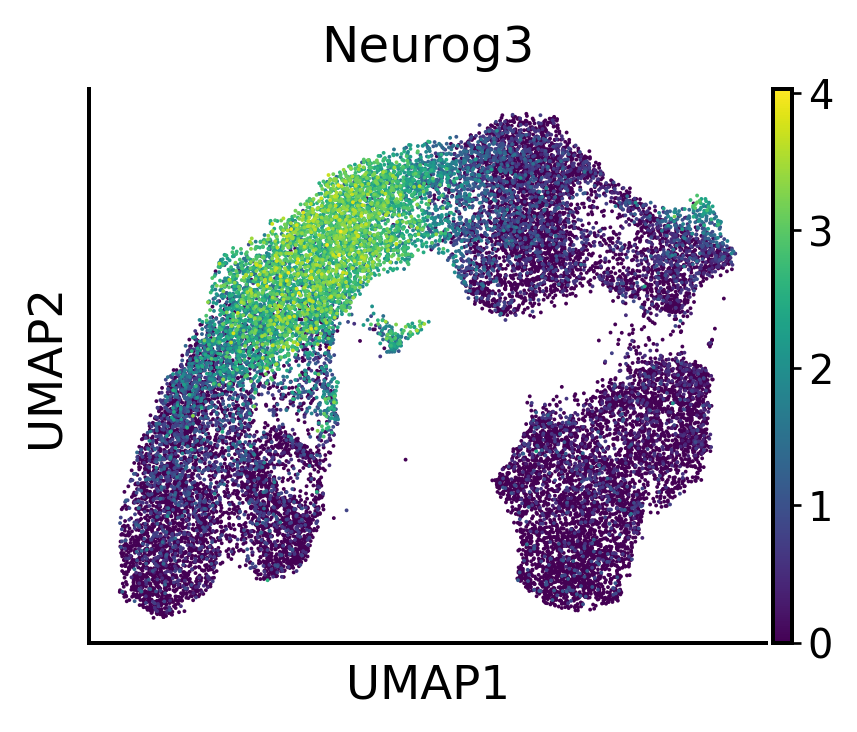

In [14]:
fig = sc.pl.umap(adata, color="Neurog3", return_fig=True)

In [15]:
fig.figure.savefig(os.path.join(output_dir, 'Neurog3.png'))

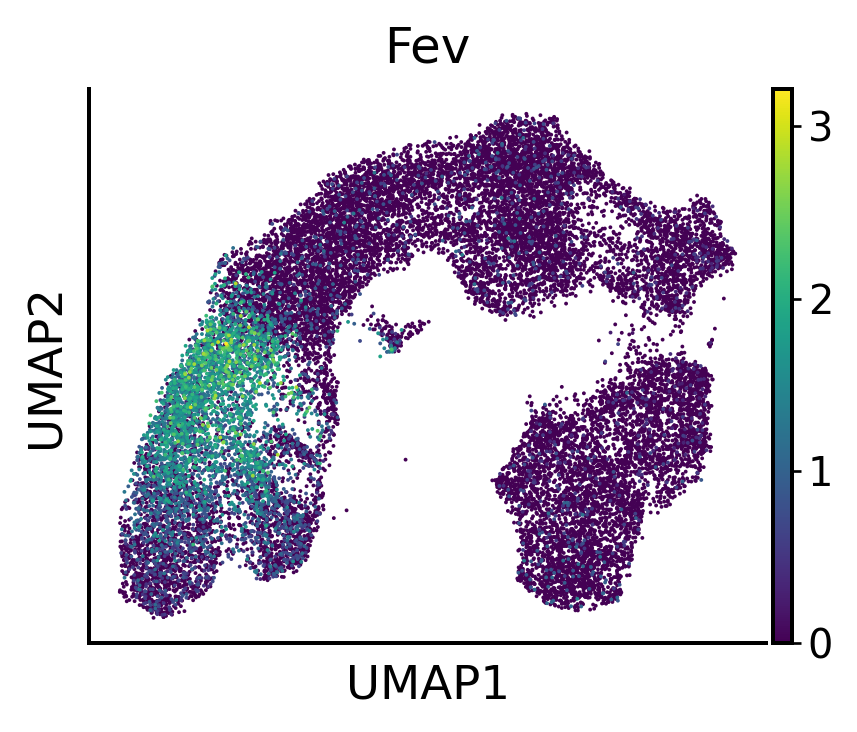

In [16]:
fig = sc.pl.umap(adata, color="Fev", return_fig=True)

In [17]:
fig.figure.savefig(os.path.join(output_dir, 'Fev.png'))

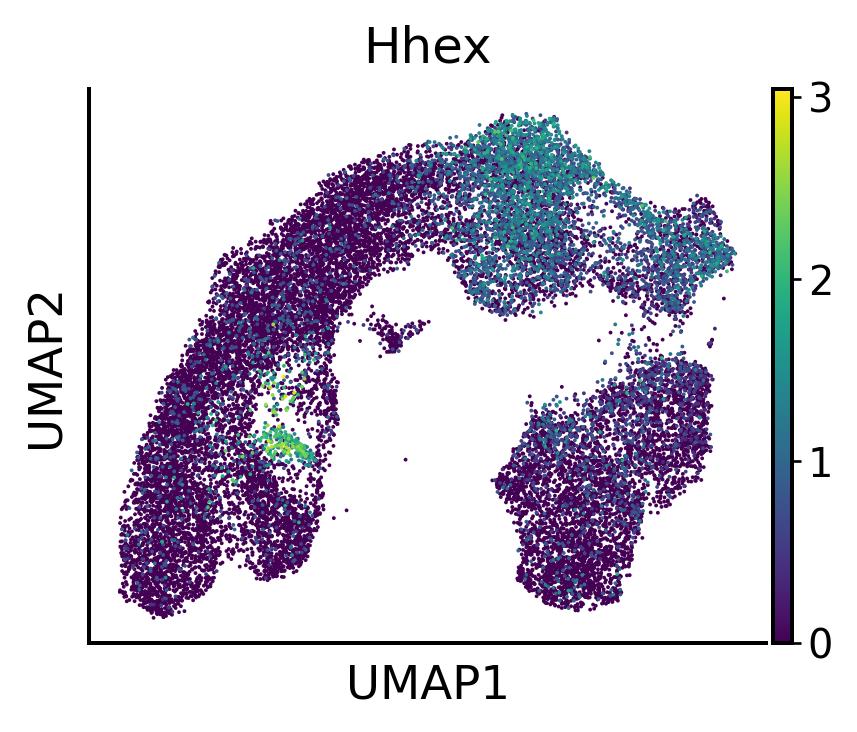

In [18]:
fig = sc.pl.umap(adata, color="Hhex", return_fig=True)

In [19]:
fig.figure.savefig(os.path.join(output_dir, 'Hhex.png'))

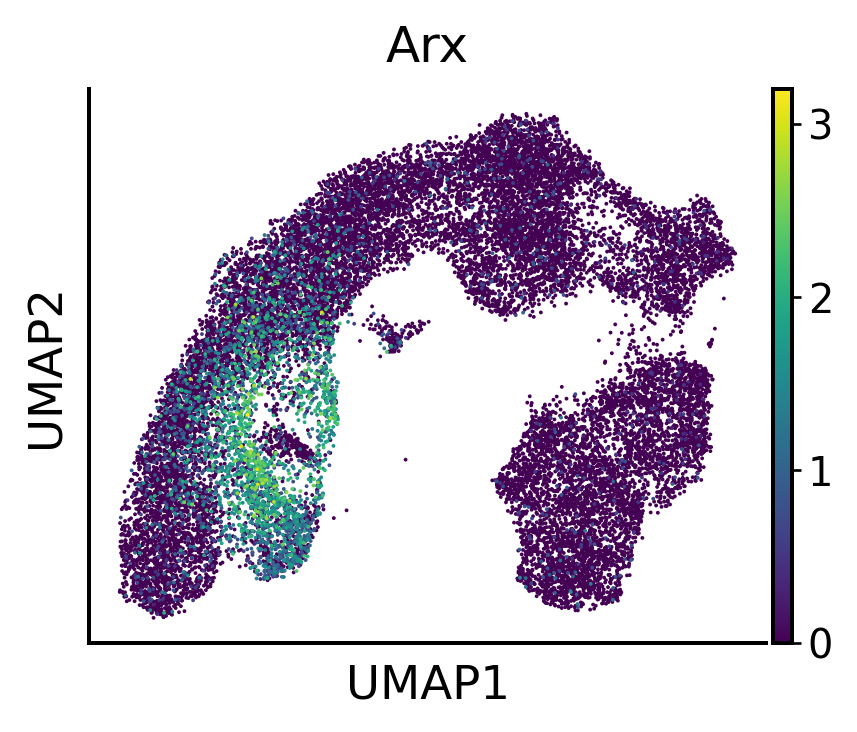

In [20]:
fig = sc.pl.umap(adata, color="Arx", return_fig=True)

In [21]:
fig.figure.savefig(os.path.join(output_dir, 'Arx.png'))

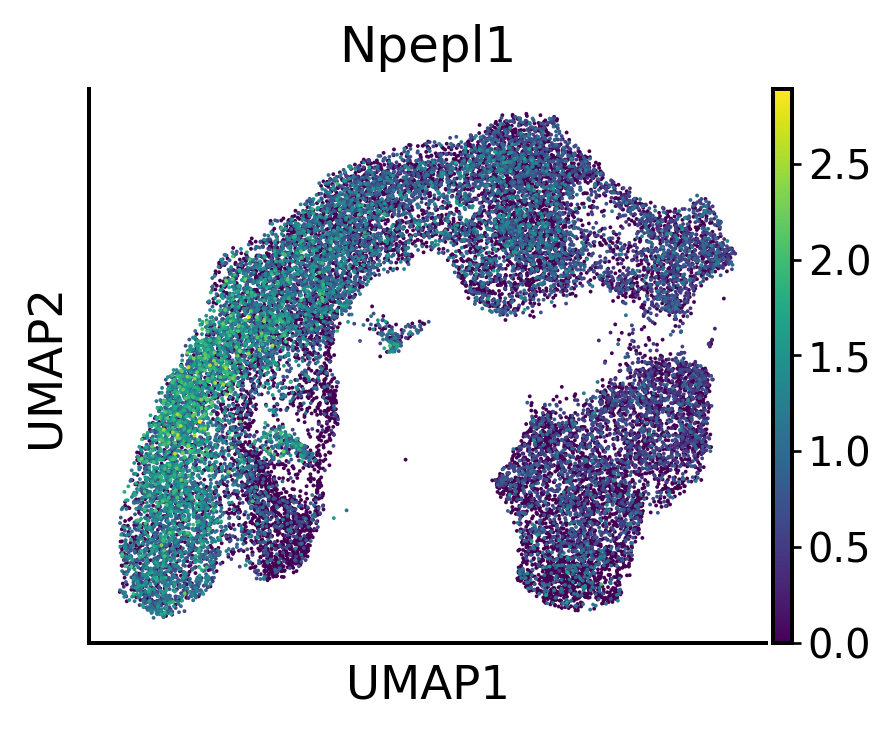

In [22]:
fig = sc.pl.umap(adata, color='Npepl1', return_fig=True)

In [23]:
fig.figure.savefig(os.path.join(output_dir, 'Npepl1.png'))

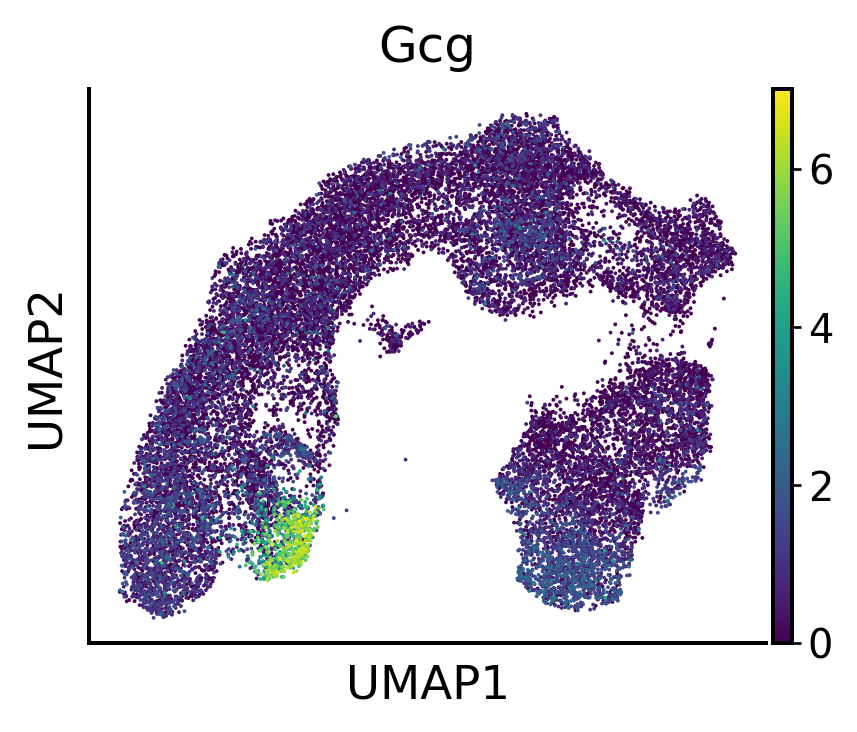

In [24]:
fig = sc.pl.umap(adata, color="Gcg", return_fig=True)

In [25]:
fig.figure.savefig(os.path.join(output_dir, 'Gcg.png'))

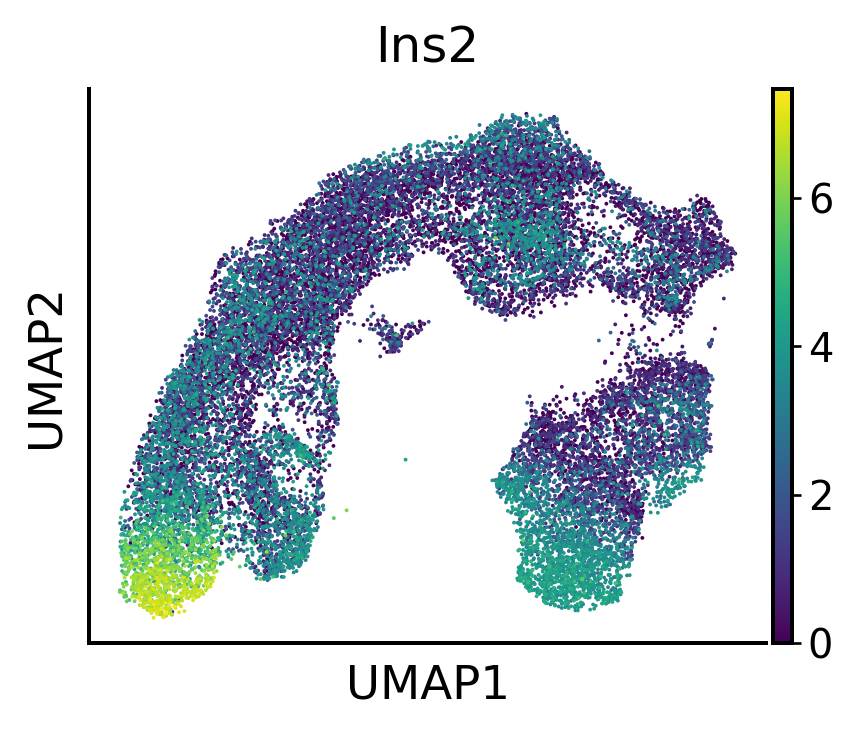

In [26]:
fig = sc.pl.umap(adata, color="Ins2", return_fig=True)

In [27]:
fig.figure.savefig(os.path.join(output_dir, 'Ins2.png'))

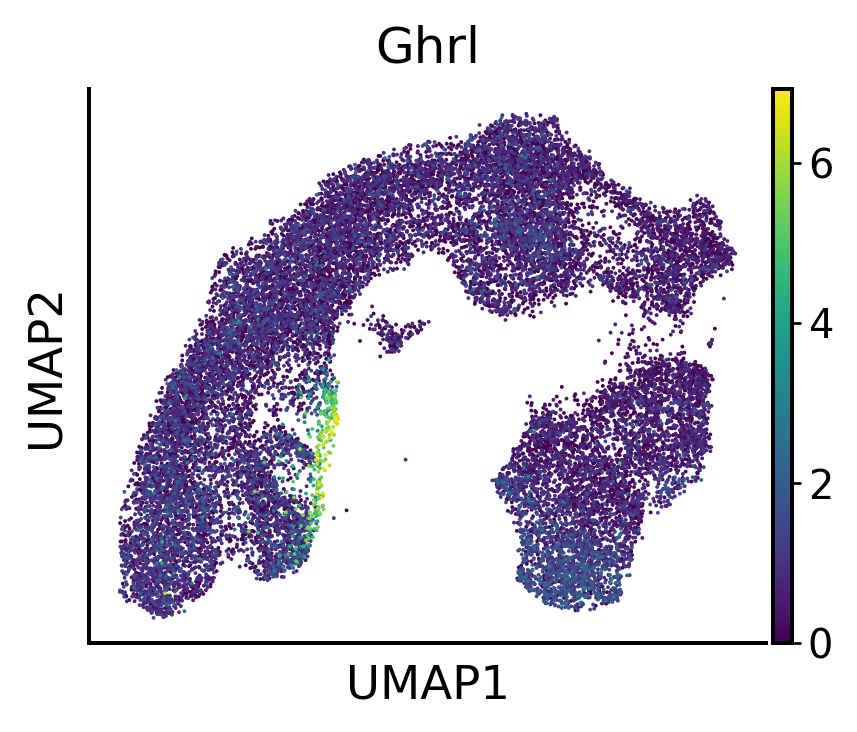

In [28]:
fig = sc.pl.umap(adata, color="Ghrl", return_fig=True)

In [29]:
fig.figure.savefig(os.path.join(output_dir, 'Ghrl.png'))

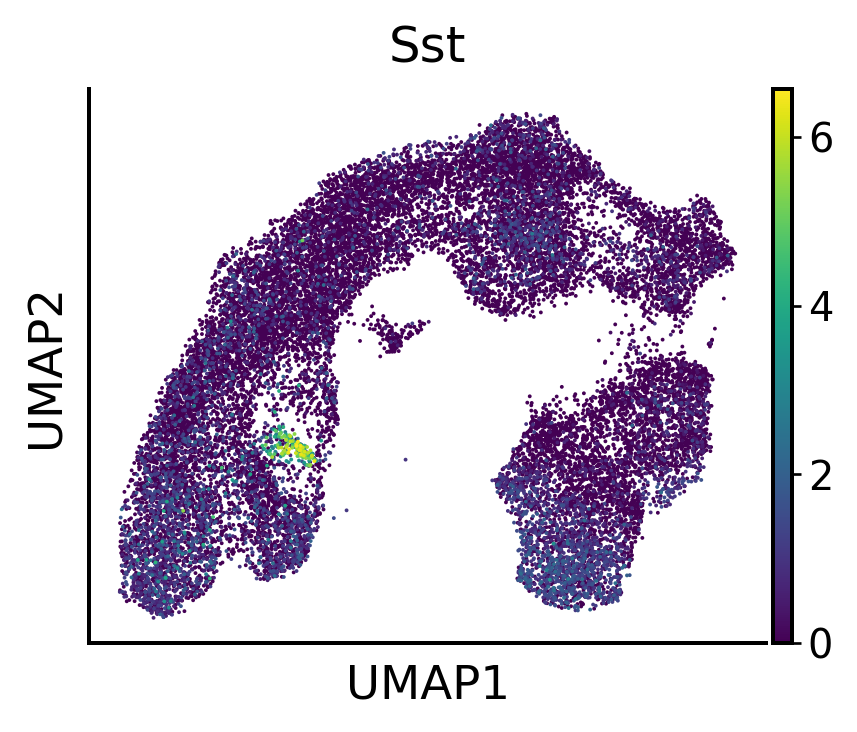

In [30]:
fig = sc.pl.umap(adata, color="Sst", return_fig=True)

In [31]:
fig.figure.savefig(os.path.join(output_dir, 'Sst.png'))

In [32]:
marker_genes = ["Reep5", "Nav2", "Mki67", "Neurog3", "Fev", "Arx", "Npepl1", "Hhex", "Gcg", "Ins2", "Sst", "Ghrl"]


In [33]:
adata.layers["scaled_counts"] = MinMaxScaler().fit_transform(adata.X.A)

In [34]:
order_celltypes = ['Mat. Acinar', 'Imm. Acinar', 'Prlf. Ductal', 'Ductal', 'Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [35]:
mudata.obs["cell_type"].cat.categories

Index(['Alpha', 'Beta', 'Delta', 'Ductal', 'Eps. progenitors', 'Epsilon',
       'Fev+', 'Fev+ Alpha', 'Fev+ Beta', 'Fev+ Delta', 'Imm. Acinar',
       'Mat. Acinar', 'Ngn3 high', 'Ngn3 high cycling', 'Ngn3 low',
       'Prlf. Ductal'],
      dtype='object')

In [36]:
adata.obs["cell_type"] = adata.obs["cell_type"].cat.reorder_categories(order_celltypes)

In [37]:
fig = sc.pl.stacked_violin(adata, var_names=marker_genes, groupby="cell_type", layer="scaled_counts", return_fig=True)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

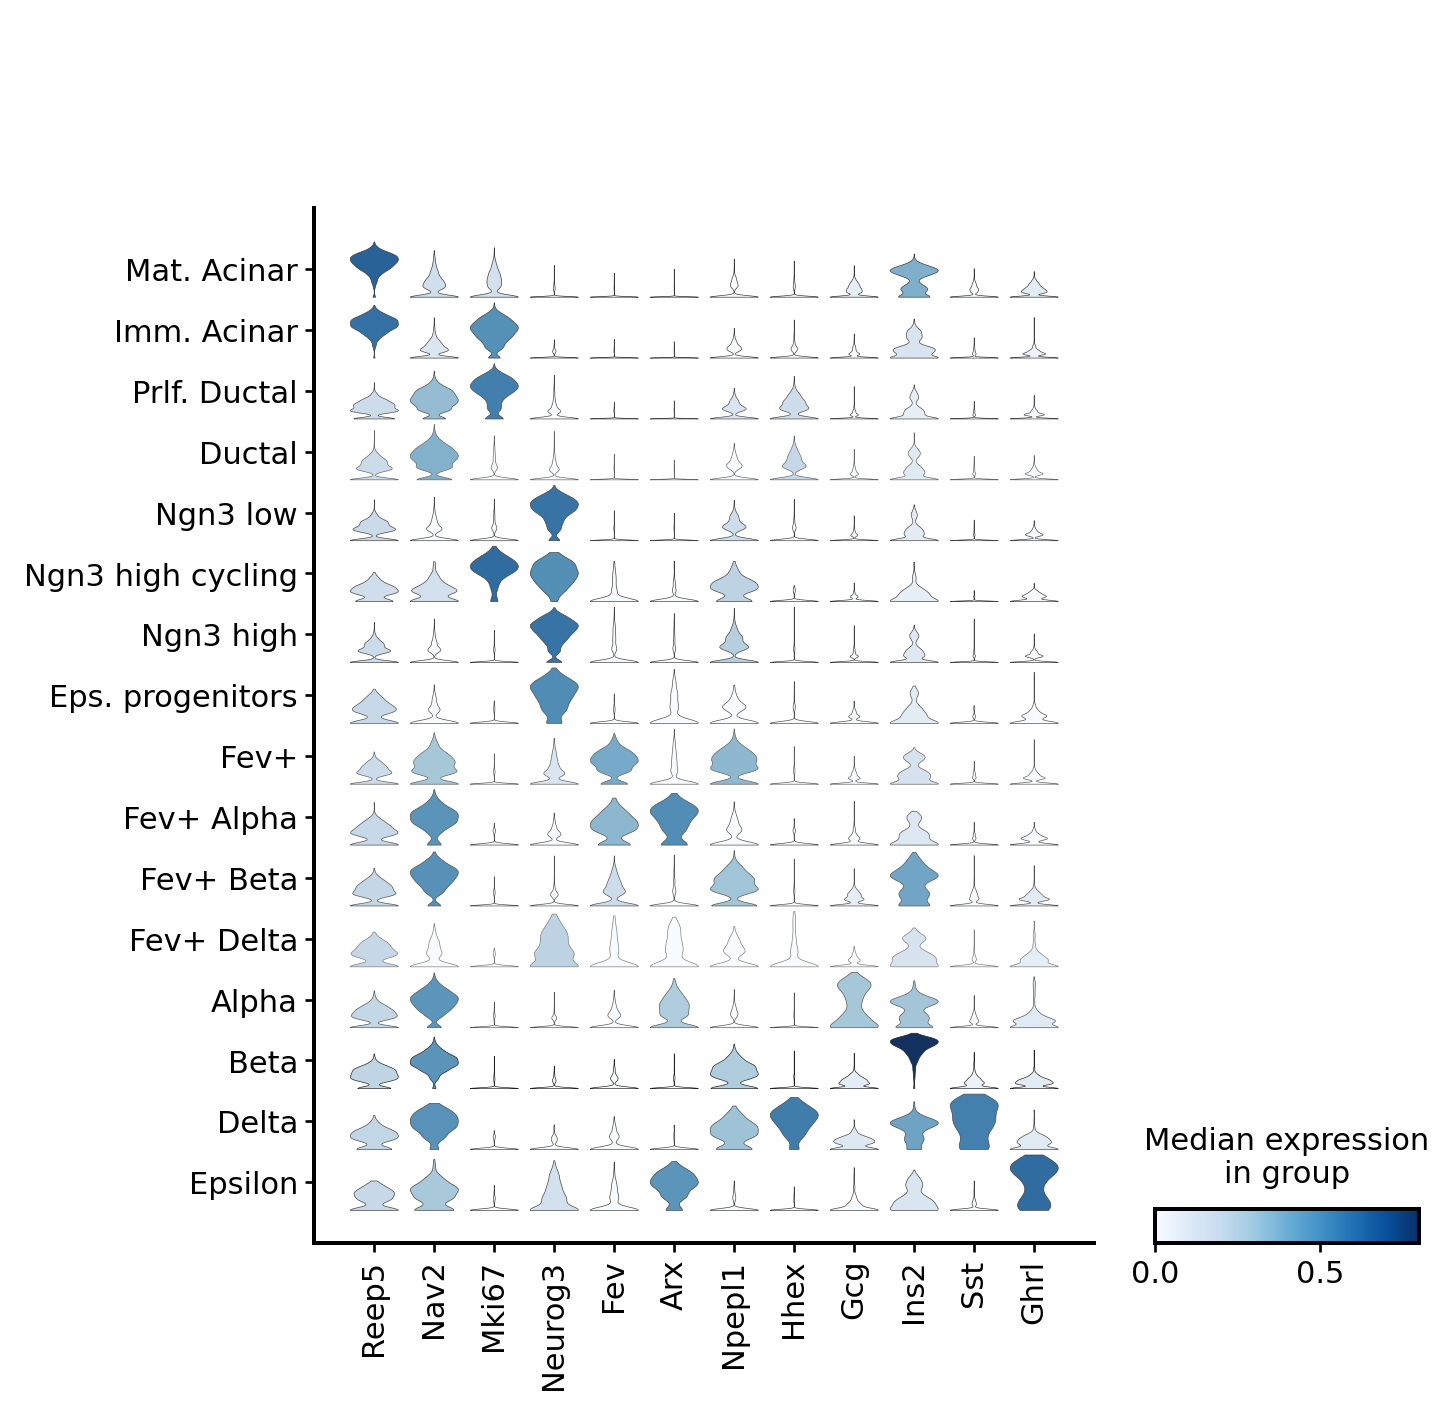

In [38]:
fig.savefig(os.path.join(output_dir, 'stacked_violin_annotation.png'))

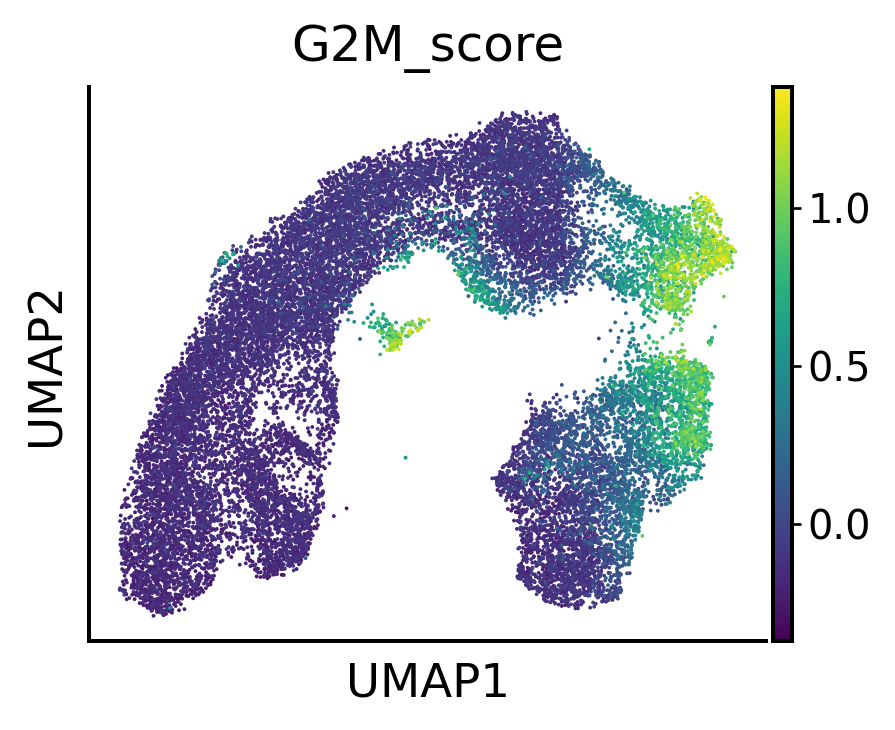

In [39]:
fig = sc.pl.umap(adata, color='G2M_score', return_fig=True)

In [40]:
fig.figure.savefig(os.path.join(output_dir, 'G2M_score.png'))

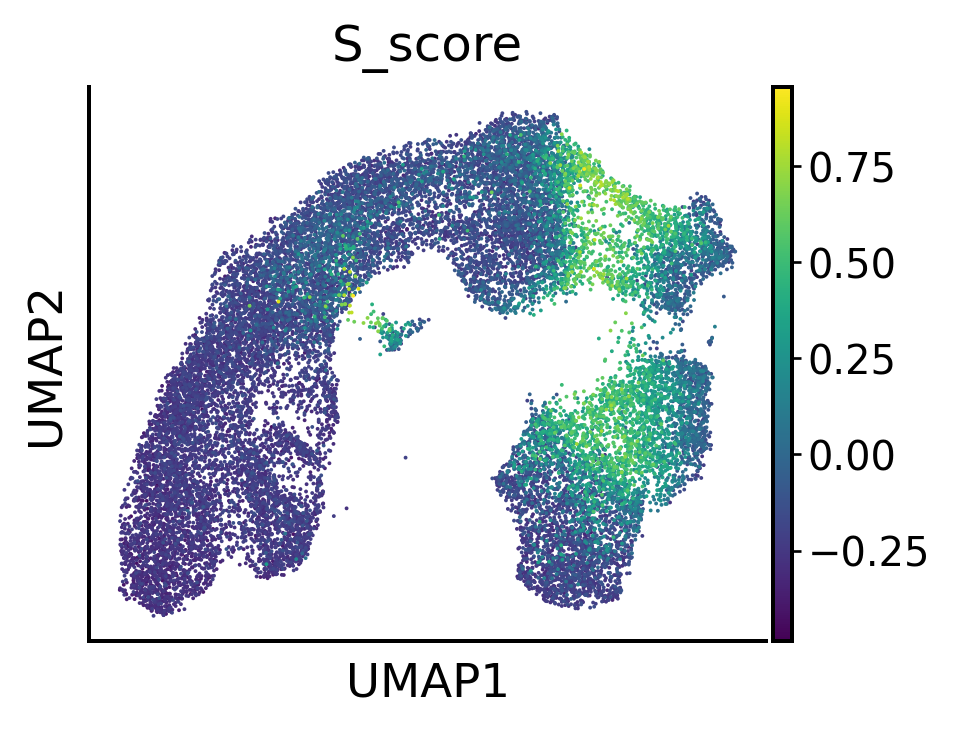

In [41]:
fig = sc.pl.umap(adata, color='S_score', return_fig=True)

In [42]:
fig.figure.savefig(os.path.join(output_dir, 'S_score.png'))

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


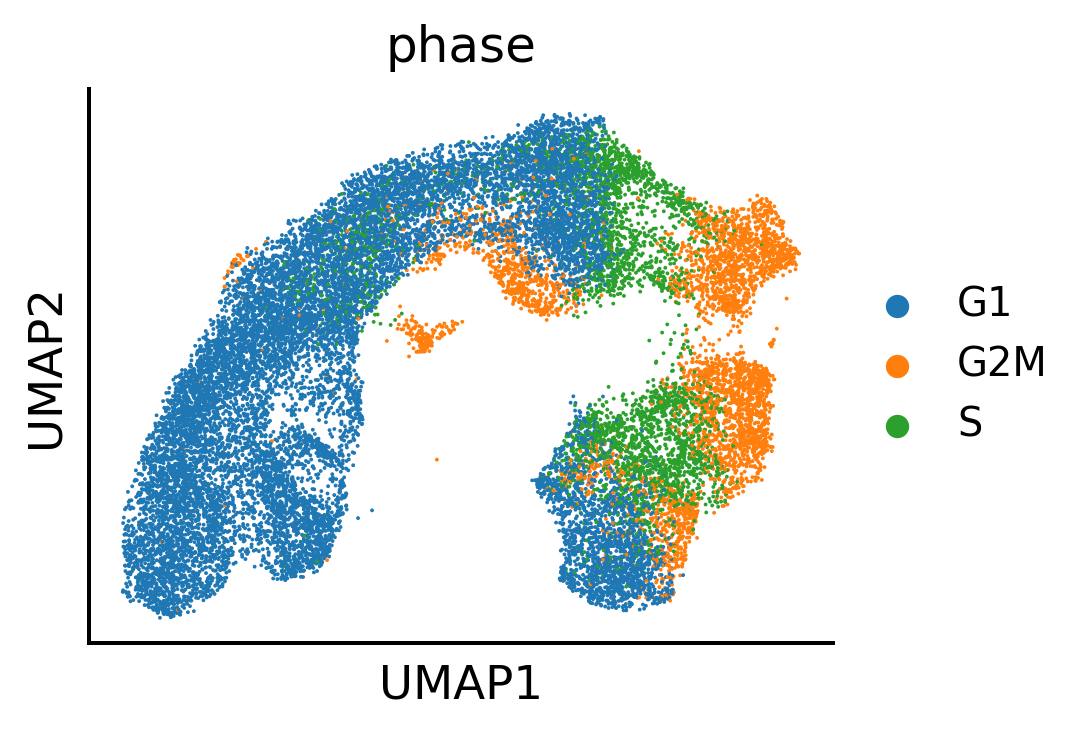

In [43]:
fig = sc.pl.umap(adata, color='phase', return_fig=True)

In [44]:
fig.figure.savefig(os.path.join(output_dir, 'cell_cycle_phase.png'))